In [21]:
import numpy as np
import json
import pandas as pd
from scipy import stats


2.3.1+cu118


In [2]:
grade_mapping = {
    'A': 4.0, 'A-': 3.7, 'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7, 'D+': 1.3, 'D': 1.0, 'F1': 0.0, 'F2': 0.0, 'F': 0.0, 'Pass': np.nan, 'S': np.nan
}

In [3]:
with open('4_Student_Data.json', 'r') as file:
    data = json.load(file)

def convert_grade(grade):
    return grade_mapping[grade]

all_grades = []

for student_key, student_data in data.items():
    for year in student_data['academic_years']:
        for semester in year['semesters']:
            for course in semester['courses']:
                all_grades.append({
                    'student': student_key,
                    'year': year['year'],
                    'course': course['code'],
                    'semester': semester['name'],
                    'letter_grade': course['grade'],
                    'numerical_grade': convert_grade(course['grade']),
                })

df = pd.DataFrame(all_grades)

print(df.head())

    student       year  course       semester letter_grade  numerical_grade
0  Student1  2020-2021  ORY100  Fall Semester            A              4.0
1  Student1  2020-2021  BİL101  Fall Semester           B+              3.3
2  Student1  2020-2021  BİL105  Fall Semester            B              3.0
3  Student1  2020-2021  BİL110  Fall Semester           B+              3.3
4  Student1  2020-2021  ENG199  Fall Semester            A              4.0


In [4]:
print(df['numerical_grade'].describe())

print(df['letter_grade'].value_counts())

print(df.groupby('course')['numerical_grade'].mean().sort_values(ascending=False))

count    214.000000
mean       2.926168
std        0.971697
min        0.000000
25%        2.300000
50%        3.000000
75%        3.700000
max        4.000000
Name: numerical_grade, dtype: float64
letter_grade
A     53
B+    26
B     25
B-    25
A-    21
C+    19
C-    13
C     12
D+     8
D      8
F1     3
F2     1
S      1
Name: count, dtype: int64
course
BİL400    4.000
BİL300    4.000
ORY100    4.000
GSBHSH    4.000
BİL494    4.000
          ...  
BİL390    2.000
MAT286    1.975
MAT311    1.860
BİL389    1.850
MAT152    1.280
Name: numerical_grade, Length: 61, dtype: float64


Calculate The Distribution For Each Course

In [5]:

def course_stats(grades):
    #grades = grades.dropna() # Remove any Nan values although we dont have any :)
    stats =pd.Series({'count': len(grades), 'mean': grades.mean(), 'std': grades.std(ddof=1) if len(grades) > 1 else np.nan, 'df': len(grades) - 1})
    return pd.DataFrame(stats).transpose()
    


course_distributions = df.groupby('course')['numerical_grade'].apply(course_stats).reset_index()
course_distributions = course_distributions.drop('level_1', axis=1)

course_distributions.columns = ['course', 'count', 'mean', 'std', 'df']

course_distributions = course_distributions.sort_values('count', ascending=False)

pd.set_option('display.max_rows', None)  # To show all rows
print("\nFull course distributions:")
print(course_distributions)


Full course distributions:
     course  count      mean       std   df
54   MAT311    5.0  1.860000  1.446720  4.0
50   MAT152    5.0  1.280000  0.804363  4.0
17   BİL343    5.0  2.080000  1.355360  4.0
16   BİL332    5.0  3.520000  0.746324  4.0
0    ATA201    4.0  2.400000  0.424264  3.0
42   FİZ103    4.0  3.100000  0.920145  3.0
1    ATA202    4.0  3.075000  0.287228  3.0
35   BİL482    4.0  2.600000  0.424264  3.0
36   BİL493    4.0  3.925000  0.150000  3.0
37   BİL494    4.0  4.000000  0.000000  3.0
38   ENG199    4.0  3.675000  0.471699  3.0
39   ENG200    4.0  3.675000  0.471699  3.0
40   ENG330    4.0  3.575000  0.505800  3.0
41   ENG460    4.0  3.100000  1.023067  3.0
44   FİZ105    4.0  3.425000  0.960469  3.0
43   FİZ104    4.0  2.675000  0.471699  3.0
27   BİL400    4.0  4.000000  0.000000  3.0
45   FİZ110    4.0  2.675000  0.694622  3.0
49   MAT151    4.0  3.000000  1.208305  3.0
51   MAT210    4.0  2.975000  0.830161  3.0
52   MAT250    4.0  2.425000  0.763217  3.0
53  

" course_distributions.columns = ['course'] + [f'numerical_grade_{col}' for col in course_distributions.columns.levels[1][1:]]\n\ncourse_distributions = course_distributions.sort_values(by='numerical_grade_mean', ascending=False)\n\npd.set_option('display.max_rows', None)\nprint(course_distributions) "

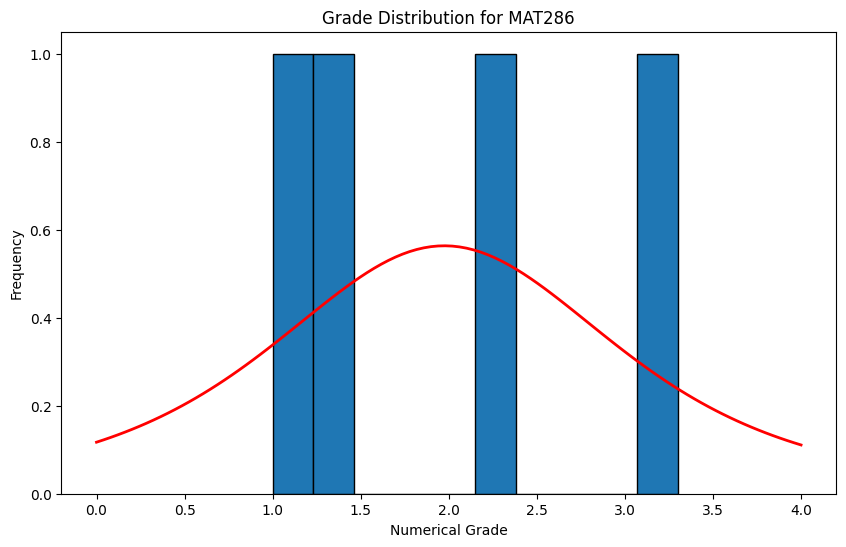

In [6]:
import matplotlib.pyplot as plt

def plot_course_distribution(df, course_code):
    course_grades = df[df['course'] == course_code]['numerical_grade'].dropna()
    if len(course_grades) < 2:
        print(f"Not enough data for course {course_code}")
        return
    
    plt.figure(figsize=(10, 6))
    plt.hist(course_grades, bins=10, edgecolor='black')
    plt.title(f'Grade Distribution for {course_code}')
    plt.xlabel('Numerical Grade')
    plt.ylabel('Frequency')
    
    # Overlay the t-distribution
    x = np.linspace(0, 4, 100)
    course_mean = course_grades.mean()
    course_std = course_grades.std(ddof=1)
    df = len(course_grades) - 1
    t_dist = stats.t.pdf(x, df, loc=course_mean, scale=course_std)
    plt.plot(x, t_dist * len(course_grades) * 0.4, 'r-', lw=2)  # Scaled for visibility
    
    plt.show()

plot_course_distribution(df,'MAT286')

In [15]:
# courses_by_semester = {
#     1: {"Bil101": 5, "Bil105": 2, "Bil110": 4, "Eng199": 4, "Fiz103": 2, "Fiz105": 5, "Mat151": 6, "Türk101": 2},
#     2: {"Bil122": 5, "Bil124": 2, "Bil172": 4, "Fiz104": 2, "Fiz110": 5, "Mat152": 6, "Mat210": 4, "Türk102": 2},
#     3: {"ATA201": 2, "BİL231": 6, "BİL265": 7, "BİL275": 7, "ENG200": 4, "SOS203": 4},
#     4: {"ATA202": 2, "BİL210": 6, "BİL218": 6, "BİL240": 6, "MAT250": 5, "MAT286": 5},
#     5: {"BİL300": 2, "BİL324": 5, "BİL343": 5, "BİL367": 5, "ENG330": 4, "MAT311": 5, "SOS204": 4},
#     6: {"BİL001": 5, "BİL007": 3, "BİL332": 7, "BİL344": 7, "BİL386": 7, "GSBHSH": 1},
#     7: {"BİL002":	5, "BİL003": 5, "BİL493":	7, "BİL498": 3, "BİL499": 6, "ENG460": 4},
#     8: {"BİL004":	5, "BİL005": 5, "BİL006":	5, "BİL482": 7, "BİL494":	8}
# }
courses_by_semester = {
    1: {"BİL101": 5, "BİL105": 2, "BİL110": 4, "ENG199": 4, "FİZ103": 2, "FİZ105": 5, "MAT151": 6, "TÜRK101": 2},
    2: {"BİL122": 5, "BİL124": 2, "BİL172": 4, "FİZ104": 2, "FİZ110": 5, "MAT152": 6, "MAT210": 4, "TÜRK102": 2},
    3: {"ATA201": 2, "BİL231": 6, "BİL265": 7, "BİL275": 7, "ENG200": 4, "SOS203": 4},
    4: {"ATA202": 2, "BİL210": 6, "BİL218": 6, "BİL240": 6, "MAT250": 5, "MAT286": 5},
    5: {"BİL300": 2, "BİL324": 5, "BİL343": 5, "BİL367": 5, "ENG330": 4, "MAT311": 5, "SOS204": 4},
    6: { "BİL332": 7, "BİL344": 7, "BİL386": 7, "GSBHSH": 1},
    7: {"BİL493":	7, "BİL400": 3, "BİL429": 6, "ENG460": 4,},
    8: { "BİL482": 7, "BİL494":	8}
}

def numerical_to_letter_grade(grade):
    if grade >= 3.7: return 'A'
    elif grade >= 3.3: return 'A-'
    elif grade >= 3.0: return 'B+'
    elif grade >= 2.7: return 'B'
    elif grade >= 2.3: return 'B-'
    elif grade >= 2.0: return 'C+'
    elif grade >= 1.7: return 'C'
    elif grade >= 1.3: return 'C-'
    elif grade >= 1.0: return 'D+'
    elif grade >= 0.7: return 'D'
    else: return 'F'


def generate_synthetic_student(course_distributions, courses_by_semester):
    synthetic_grades = []
    
    for semester, courses in courses_by_semester.items():
        for course in courses:
            course_stats = course_distributions[course_distributions['course'] == course]
            
            if course_stats.empty:
                print(f"Warning: No data for course {course}. Skipping.")
                continue
            
            course_stats = course_stats.iloc[0]
            
            # Generate a grade using t-distribution
            if course_stats['count'] > 1:  # Ensure we have enough data to use t-distribution
                grade = stats.t.rvs(df=course_stats['df'], 
                                    loc=course_stats['mean'], 
                                    scale=course_stats['std'])
                
                # Clip the grade to be between 0 and 4
                grade = np.clip(grade, 0, 4)
            else:
                # If we don't have enough data, just use the mean
                grade = course_stats['mean']
            
            synthetic_grades.append({
                'semester': semester,
                'course': course,
                'grade': grade
            })
    
    return synthetic_grades

In [20]:
synthetic_student = generate_synthetic_student(course_distributions, courses_by_semester)

# Print the synthetic student's grades
print("Synthetic Student Grades:")
for course in synthetic_student:
    numerical_grade = course['grade']
    letter_grade = numerical_to_letter_grade(numerical_grade)
    print(f"Semester: {course['semester']}, Course: {course['course']}, Numerical Grade: {numerical_grade:.2f}, Letter Grade: {letter_grade}")

# Calculate overall GPA
overall_gpa = np.mean([course['grade'] for course in synthetic_student])
print(f"\nSynthetic Student Overall GPA: {overall_gpa:.2f}")

# Calculate GPA for each semester
for semester in range(1, 9):
    semester_courses = [course for course in synthetic_student if course['semester'] == semester]
    if semester_courses:
        semester_gpa = np.mean([course['grade'] for course in semester_courses])
        print(f"Semester {semester} GPA: {semester_gpa:.2f}")

Synthetic Student Grades:
Semester: 1, Course: BİL101, Numerical Grade: 3.64, Letter Grade: A-
Semester: 1, Course: BİL105, Numerical Grade: 4.00, Letter Grade: A
Semester: 1, Course: BİL110, Numerical Grade: 2.59, Letter Grade: B-
Semester: 1, Course: ENG199, Numerical Grade: 3.30, Letter Grade: A-
Semester: 1, Course: FİZ103, Numerical Grade: 1.47, Letter Grade: C-
Semester: 1, Course: FİZ105, Numerical Grade: 1.82, Letter Grade: C
Semester: 1, Course: MAT151, Numerical Grade: 1.39, Letter Grade: C-
Semester: 1, Course: TÜRK101, Numerical Grade: 4.00, Letter Grade: A
Semester: 2, Course: BİL122, Numerical Grade: 2.90, Letter Grade: B
Semester: 2, Course: BİL124, Numerical Grade: 3.44, Letter Grade: A-
Semester: 2, Course: BİL172, Numerical Grade: 3.18, Letter Grade: B+
Semester: 2, Course: FİZ104, Numerical Grade: 2.45, Letter Grade: B-
Semester: 2, Course: FİZ110, Numerical Grade: 1.45, Letter Grade: C-
Semester: 2, Course: MAT152, Numerical Grade: 1.64, Letter Grade: C-
Semester: 2